<a href="https://colab.research.google.com/github/mgw54/Colab_Clones/blob/main/20250430_KetoAld_PR_normalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tkinter
from tkinter import filedialog
import os
import csv
import re
from decimal import Decimal

import matplotlib.pyplot as plt


from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))


import io
# Use pd.read_excel for .xlsx files
df = pd.read_excel(io.BytesIO(uploaded[filename]))
# Replace headers with the next row
#df.columns = df.iloc[0]  # Set the first row as the new headers
#df = df[1:]  # Remove the first row (which is now the headers)
print(df)

# Setting up the font to be the latex font beacuse I'm a sad bastard
import matplotlib as mpl
mpl.rcParams['font.family']='serif'
mpl.rcParams['mathtext.fontset']='cm'
import matplotlib.pyplot as plt

Saving 20250219_PR_Data_justcolumns.xlsx to 20250219_PR_Data_justcolumns.xlsx
     time (s)  CarbAld_WT  Keto_WT  CarbAld_4_22  Keto_4_22  CarbAld_5_3  \
0        0.00       2.828    3.256         2.897      3.231        3.048   
1       60.00       2.792    3.302         2.930      3.246        3.035   
2      120.00       2.801    3.171         2.820      3.211        3.072   
3      180.00       2.749    3.202         2.964      3.206        3.017   
4      240.00       2.853    3.157         2.979      3.130        3.211   
..        ...         ...      ...           ...        ...          ...   
995  59701.12      12.330    4.241        46.550      5.123       54.730   
996  59761.13      12.480    4.218        46.840      5.149       54.450   
997  59821.10      12.290    4.266        47.130      5.199       54.400   
998  59881.12      12.450    4.218        46.980      5.217       55.040   
999  59941.13      12.380    4.191        44.630      5.202       54.820   

     Keto

In [ ]:
RuList_ald = [17.84736597, 16.91168513, 30.85840801, 0.21660682]
RuList_keto = [20.16901991, 17.63750495, 30.78883314, 0.119500587]

In [ ]:
for column in df.columns:
    first_value = df[column].iloc[0]
    df[column] = df[column] - first_value

df['CarbAld_WT'] = (df['CarbAld_WT'] / RuList_ald[0]) / 2247764.67898598
df['CarbAld_4_22'] = (df['CarbAld_4_22'] / RuList_ald[1]) / 2247764.67898598
df['CarbAld_5_3'] = (df['CarbAld_5_3'] / RuList_ald[2]) / 2247764.67898598
df['CarbAld_blank'] = (df['CarbAld_blank'] / RuList_ald[3]) / 2247764.67898598

df['Keto_WT'] = (df['Keto_WT'] / RuList_keto[0]) / 2247764.67898598
df['Keto_4_22'] = (df['Keto_4_22'] / RuList_keto[1]) / 2247764.67898598
df['Keto_5_3'] = (df['Keto_5_3'] / RuList_keto[2]) / 2247764.67898598
df['Keto_blank'] = (df['Keto_blank'] / RuList_keto[3]) / 2247764.67898598


print(df)

     time (s)    CarbAld_WT       Keto_WT  CarbAld_4_22     Keto_4_22  \
0        0.00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1       60.00 -5.028094e-11  5.030804e-11  5.133214e-11  2.145192e-11   
2      120.00 -3.771071e-11 -9.296051e-11 -1.197750e-10 -2.860256e-11   
3      180.00 -1.103387e-10 -5.905726e-11  1.042198e-10 -3.575320e-11   
4      240.00  3.491732e-11 -1.082717e-10  1.275526e-10 -1.444429e-10   
..        ...           ...           ...           ...           ...   
995  59701.12  1.327138e-08  1.077248e-09  6.790308e-08  2.705802e-09   
996  59761.13  1.348088e-08  1.052094e-09  6.835418e-08  2.742985e-09   
997  59821.10  1.321551e-08  1.104590e-09  6.880528e-08  2.814492e-09   
998  59881.12  1.343898e-08  1.052094e-09  6.857195e-08  2.840234e-09   
999  59941.13  1.334121e-08  1.022566e-09  6.491648e-08  2.818782e-09   

      CarbAld_5_3      Keto_5_3  CarbAld_blank  Keto_blank  
0    0.000000e+00  0.000000e+00   0.000000e+00    0.000000  
1

<ipython-input-12-e6873e2e4f8c>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 4)  # Create a colormap with enough colors


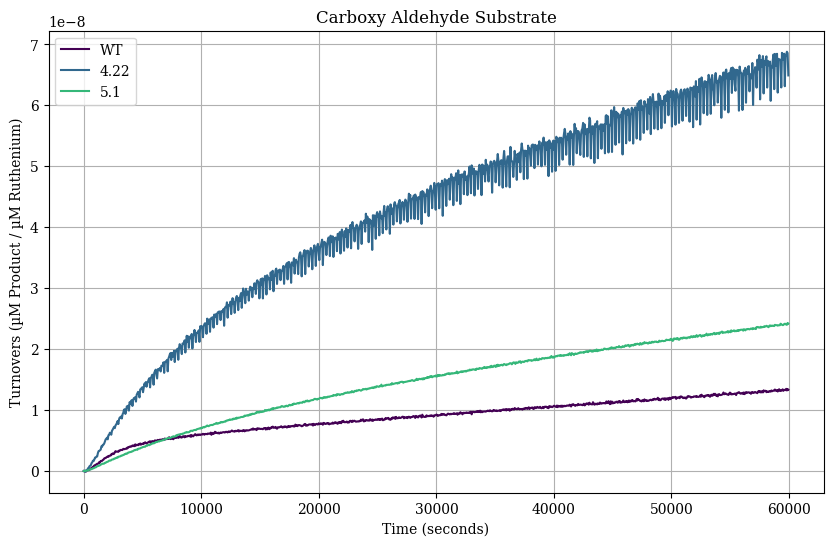

In [ ]:
import matplotlib.cm as cm

# Use viridis colormap
viridis = cm.get_cmap('viridis', 4)  # Create a colormap with enough colors

plt.figure(figsize=(10, 6))

# Plot 'carboxy aldehyde' data
plt.plot(df['time (s)'], df['CarbAld_WT'],
             color=viridis(0), label='WT')
plt.plot(df['time (s)'], df['CarbAld_4_22'],
             color=viridis(1), label='4.22')
plt.plot(df['time (s)'], df['CarbAld_5_3'],
             color=viridis(2), label='5.1')
#plt.plot(df['time (s)'], df['CarbAld_blank'],
             #color=viridis(3), label='Blank')




plt.ylabel("Turnovers (µM Product / µM Ruthenium)")
plt.xlabel('Time (seconds)')
plt.title('Carboxy Aldehyde Substrate')
plt.legend()
plt.grid(True)
plt.show()

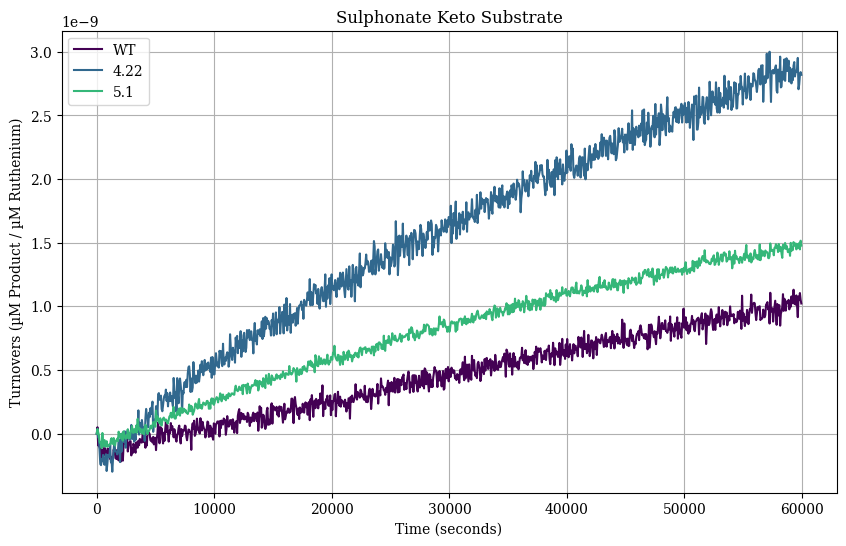

In [ ]:
# plotting the keto results

plt.figure(figsize=(10, 6))

# Plot 'carboxy aldehyde' data
plt.plot(df['time (s)'], df['Keto_WT'],
             color=viridis(0), label='WT')
plt.plot(df['time (s)'], df['Keto_4_22'],
             color=viridis(1), label='4.22')
plt.plot(df['time (s)'], df['Keto_5_3'],
             color=viridis(2), label='5.1')
#plt.plot(df['time (s)'], df['Keto_blank'],
             #color=viridis(3), label='Blank')




plt.ylabel("Turnovers (µM Product / µM Ruthenium)")
plt.xlabel('Time (seconds)')
plt.title('Sulphonate Keto Substrate')
plt.legend()
plt.grid(True)
plt.show()

Saving 20250106_r5muts_averaged_turnover_data.xlsx to 20250106_r5muts_averaged_turnover_data (1).xlsx


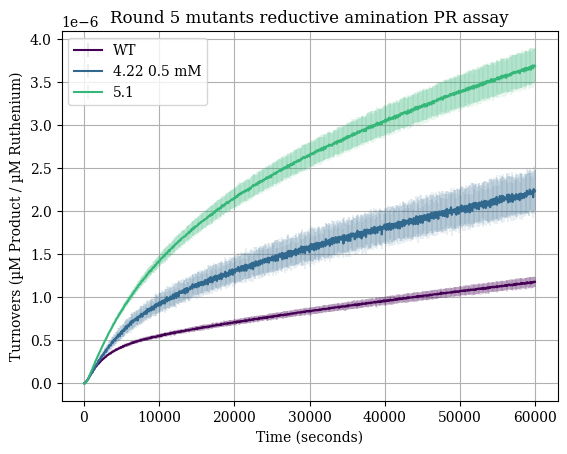

In [ ]:
#importing the data from the r5 scren against sulphonate aldehyde substrate from 20250106_r5muts_averaged_turnover_data.xlsx

import numpy as np
import pandas as pd
import tkinter
from tkinter import filedialog
import os
import csv
import re
from decimal import Decimal

import matplotlib.pyplot as plt


from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))


import io
# Use pd.read_excel for .xlsx files
df = pd.read_excel(io.BytesIO(uploaded[filename]))
# Replace headers with the next row
df.columns = df.iloc[0]  # Set the first row as the new headers
df = df[1:]  # Remove the first row (which is now the headers)


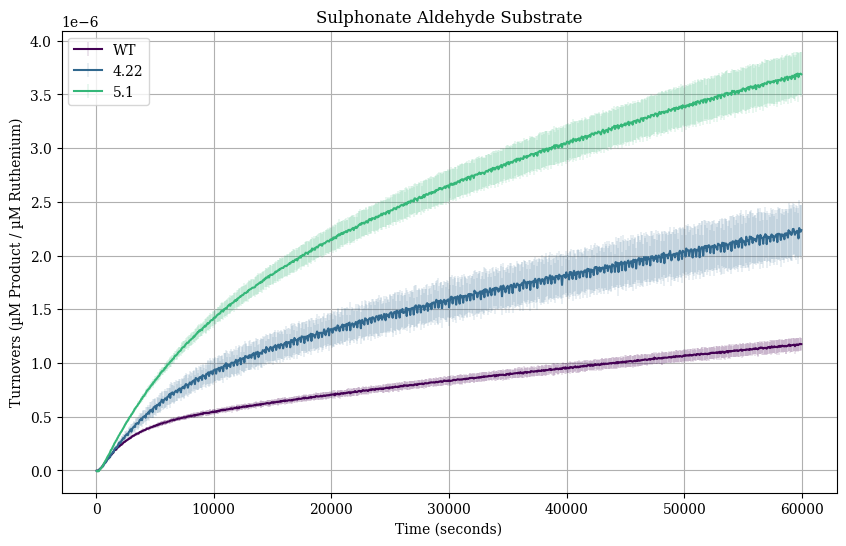

In [ ]:

df_columns = list(df.columns)  # Convert Index to list for modification
df_columns[0] = 'Time'
df_columns[1] = 'WT'
df_columns[2] = 'WT_SD' # Change the second element (index 1)
df_columns[3] = '4.22 0.5 mM'
df_columns[4] = '4.22_0.5_SD'
df_columns[5] = '4.22 1 mM'
df_columns[6] = '4.22_1_SD'
df_columns[7] = '5.1'
df_columns[8] = '5.1_SD'
df_columns[9] = '5.2'
df_columns[10] = '5.2_SD'
df_columns[11] = '5.3'
df_columns[12] = '5.3_SD'
df_columns[13] = '5.4'
df_columns[14] = '5.4_SD'
df_columns[15] = '5.5'
df_columns[16] = '5.5_SD'
df_columns[17] = '5.6'
df_columns[18] = '5.6_SD'
df_columns[19] = '5.7'
df_columns[20] = '5.7_SD'
df_columns[21] = '5.8'
df_columns[22] = '5.8_SD'

# Convert back to Index if needed
df.columns = pd.Index(df_columns) # This line was already present

plt.figure(figsize=(10, 6))

# Plot 'WT' data
plt.errorbar(df.iloc[2:1002, 0], df['WT'][2:1002],  yerr=df['WT_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(0)[:3], 0.5),
             color=viridis(0), label='WT')

# Plot '4.22 0.5 mM' data
plt.errorbar(df.iloc[2:1002, 0], df['4.22 0.5 mM'][2:1002],  yerr=df['4.22_0.5_SD'][2:1002], capsize=0, elinewidth=0.3,ecolor=(*viridis(1)[:3], 0.5),
             color=viridis(1), label='4.22')

# Plot '5.1' data
plt.errorbar(df.iloc[2:1002, 0], df['5.1'][2:1002], yerr=df['5.1_SD'][2:1002], capsize=0, elinewidth=0.3,
             ecolor=(*viridis(2)[:3], 0.5), color=viridis(2), label='5.1')

plt.ylabel("Turnovers (µM Product / µM Ruthenium)")
plt.xlabel('Time (seconds)')
plt.title('Sulphonate Aldehyde Substrate')
plt.legend()
plt.grid(True)
plt.show()